<a href="https://colab.research.google.com/github/komal7-alpha/HAMOYE-DE-INTERNSHIP-NOTES/blob/main/HAMOYE_AWS_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing required Libraries 

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from scipy.stats import kendalltau
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import lazypredict
from lazypredict.Supervised import LazyClassifier, LazyRegressor
import graphviz
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("banknotes.csv")

In [3]:
df.head()

,conterfeit,Length,Left,Right,Bottom,Top,Diagonal
0,0,214.80,131.00,131.10,9.00,9.70,141.00
1,0,214.60,129.70,129.70,8.10,9.50,141.70
2,0,214.80,129.70,129.70,8.70,9.60,142.20
3,0,214.80,129.70,129.60,7.50,10.40,142.00
4,0,215.00,129.60,129.70,10.40,7.70,141.80


In [4]:
df.columns

Index(['conterfeit', 'Length', 'Left', 'Right', 'Bottom', 'Top', 'Diagonal'], dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   conterfeit  200 non-null    int64  
 1   Length      200 non-null    float64
 2   Left        200 non-null    float64
 3   Right       200 non-null    float64
 4   Bottom      200 non-null    float64
 5   Top         200 non-null    float64
 6   Diagonal    200 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 11.1 KB


In [6]:
df.describe()

,conterfeit,Length,Left,Right,Bottom,Top,Diagonal
count,200.00,200.00,200.00,200.00,200.00,200.00,200.00
mean,0.50,214.90,130.12,129.96,9.42,10.65,140.48
std,0.50,0.38,0.36,0.40,1.44,0.80,1.15
min,0.00,213.80,129.00,129.00,7.20,7.70,137.80
25%,0.00,214.60,129.90,129.70,8.20,10.10,139.50
50%,0.50,214.90,130.20,130.00,9.10,10.60,140.45
75%,1.00,215.10,130.40,130.22,10.60,11.20,141.50
max,1.00,216.30,131.00,131.10,12.70,12.30,142.40


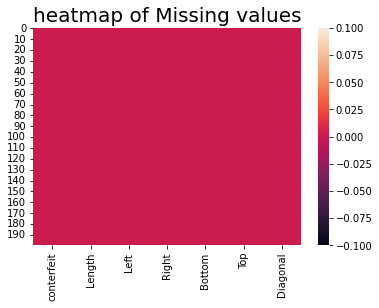

In [7]:
sns.heatmap(df.isnull())
plt.title("heatmap of Missing values", fontsize = 20)
plt.show()

No missing value found

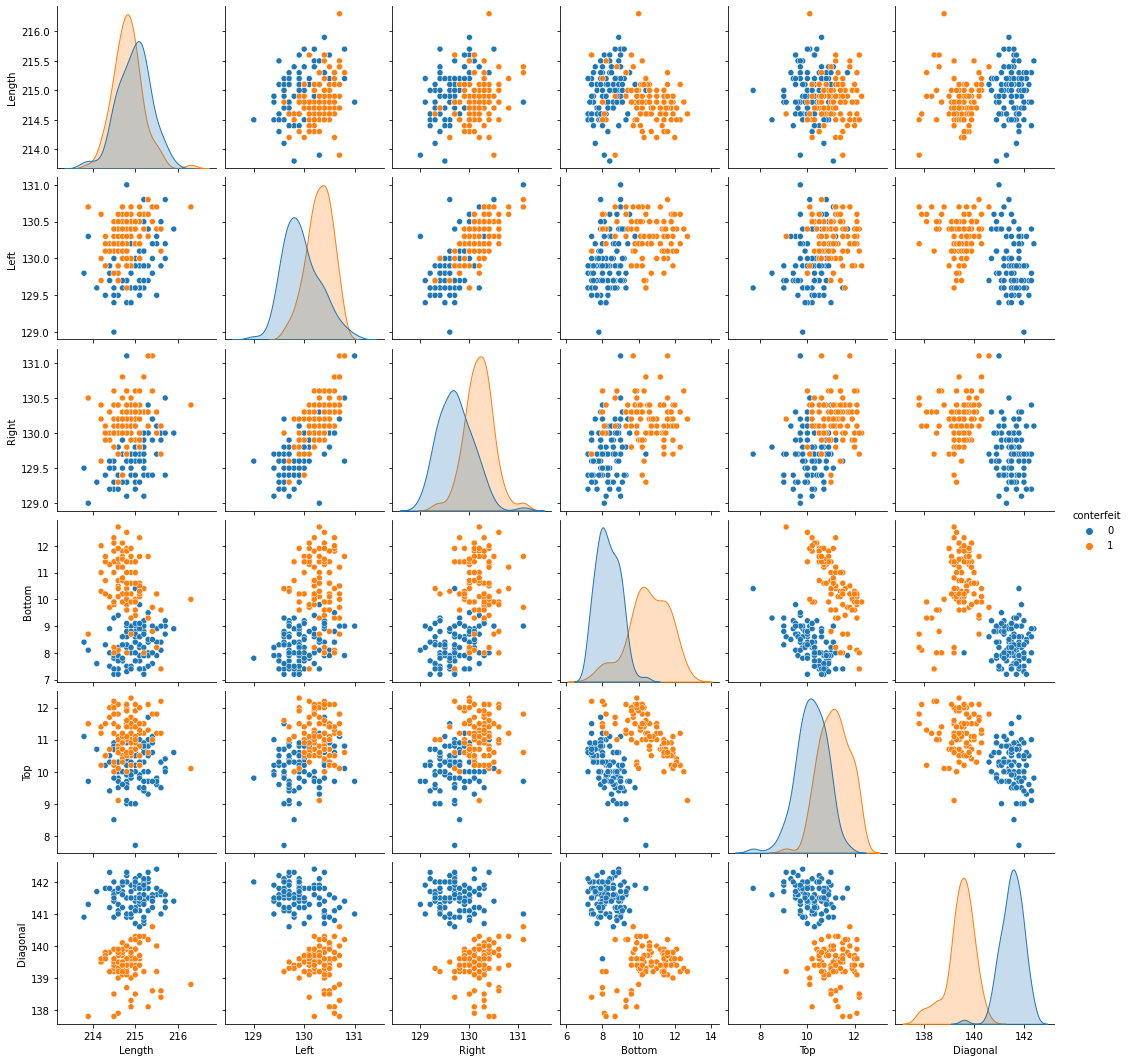

In [8]:
sns.pairplot(df, hue = "conterfeit")
plt.show()

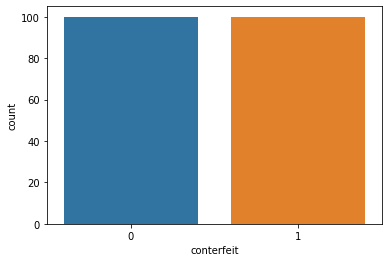

In [9]:
sns.countplot(df['conterfeit'])
plt.show()

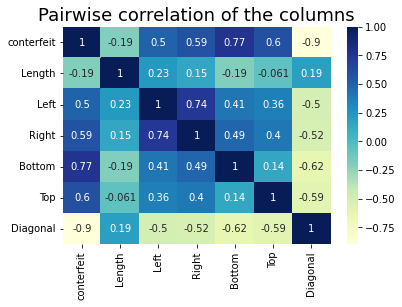

In [10]:
sns.heatmap(df.corr(), annot = True, cmap="YlGnBu")
plt.title("Pairwise correlation of the columns", fontsize = 18)
plt.show()

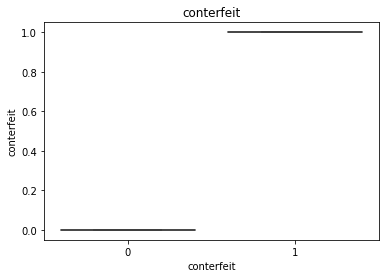

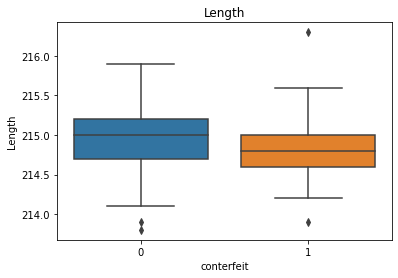

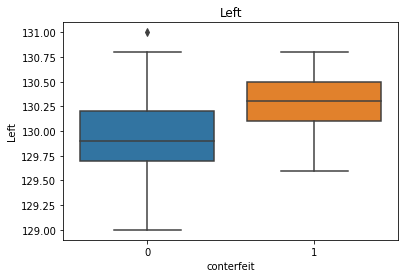

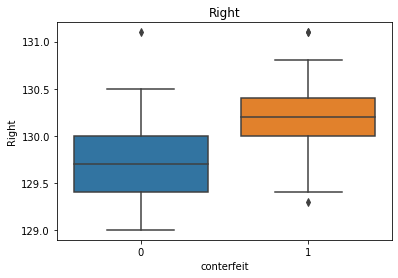

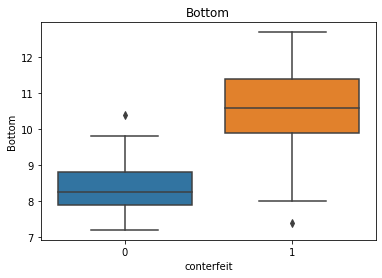

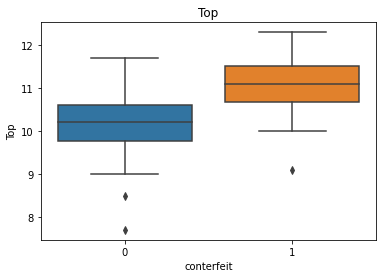

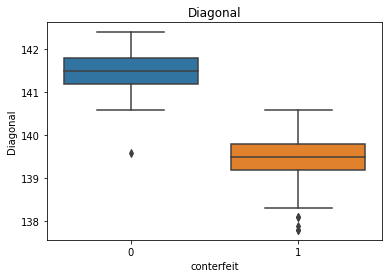

In [11]:
for column in df.columns:
    sns.boxplot(y=column, data=df, x='conterfeit')
    plt.title(column)
    plt.show()

In [12]:
df = df.reindex(np.random.permutation(df.index))

X = df.drop(columns = "conterfeit")
y = df["conterfeit"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

st = StandardScaler()
X_train = st.fit_transform(X_train)

In [13]:
# Splitting our data into a train and test set

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size= 5,random_state=123)
classifiers = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)

models,predictions = classifiers.fit(X_train, X_test, y_train, y_test)

print(models)

100%|██████████| 29/29 [00:00<00:00, 35.73it/s]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
AdaBoostClassifier                 1.00               1.00     1.00      1.00   
LogisticRegression                 1.00               1.00     1.00      1.00   
XGBClassifier                      1.00               1.00     1.00      1.00   
SVC                                1.00               1.00     1.00      1.00   
SGDClassifier                      1.00               1.00     1.00      1.00   
RidgeClassifierCV                  1.00               1.00     1.00      1.00   
RidgeClassifier                    1.00               1.00     1.00      1.00   
RandomForestClassifier             1.00               1.00     1.00      1.00   
QuadraticDiscriminantAnalysis      1.00               1.00     1.00      1.00   
Perceptron                         1.00               1.00     1.00      1.00   
PassiveAggressiveClassifier 